# Демодуляция. 
# Single Sideband Suppressed Carrier 
# (AM-SSB-SC)

## 1. Когерентная демодуляция
Рассмотрим когерентный способ демодуляции однополосного АМ-сигнала с подавленной несущей. Для этого принятый сигнал нужно смешать (перемножить) с колебанием, которое является копией несущей. Затем результат необходимо пропустить через фильтр нижних частот (ФНЧ). Схема когерентного демодулятора представлена ниже:

<img src="../../images/DSB_TC_Receiver_1_1.png" width=450/>

Для примера рассмотрим USB сигнал. Результаты для LSB получаются таким же образом и отличаются только знаком перед квадратурной частью принимаемого однополосного сигнала.В аналитическом виде описанные выше преобразования можно представить следующим образом. Пусть принятый однополосный сигнал имеет вид:

$$s_{\textrm{am}} \left(t\right)=m\left(t\right)\cdot \cos \left(2\pi f_c t\right)-m_H \left(t\right)\cdot \sin \left(2\pi f_c t\right),$$

где $m\left(t\right)$ - информационное сообщение, $m_H \left(t\right)$ - преобразование Гильберта от сообщения, $f_c$ - частота несущей.

После перемножения с гармоничеким сигналом, частота и фаза которого совпадают с несущей, получим:

$$s_{\textrm{mix}} \left(t\right)=\left\lbrack m\left(t\right)\cdot \cos \left(2\pi f_c t\right)-m_H \left(t\right)\cdot \sin \left(2\pi f_c t\right)\right\rbrack \cdot \cos \left(2\pi f_c t\right)=$$

$$m\left(t\right)\cdot \cos \left(2\pi f_c t\right)\cdot \cos \left(2\pi f_c t\right)-m_H \left(t\right)\cdot \sin \left(2\pi f_c t\right)\cdot \cos \left(2\pi f_c t\right).$$

Вспомнив правило произведения косинусов и синусов, можем записать результат умножения в виде:

$$s_{\textrm{mix}} \left(t\right)=\frac{1}{2}m\left(t\right)+\frac{1}{2}m\left(t\right)\cdot \cos \left(2\pi \cdot 2f_c \cdot t\right)-\frac{1}{2}m_H \left(t\right)\cdot \sin \left(2\pi \cdot 2f_c \cdot t\right).$$

Таким образом, сигнал на выходе смесителя явялется суммой инфомационного сообщения, а также сообщения и его преобразования Гильберта на удвоенной частоте несущей $2f_c$. После пропускания данной суммы через ФНЧ, слагаемые на удвоенной частоте исчезнут, и мы получим:

$$s_{\textrm{LPF}} \left(t\right)=\frac{1}{2}m\left(t\right).$$

То есть, восстановленный сигнал является масштабированной копией исходного сообщения. 

Сложность при таком методе демодуляции заключается в том, что колебание в смесителе должно точно совпадать по частоте и фазе с несущей. Очевидно, что на практике генераторы на передающей и приемной сторонах не могут быть абсолютно идентичными. Между ними всегда есть некоторая расстройка. Рассмотрим вляние такого рассогласования на качество  демодуляции. Пусть рассогласование по частоте и фазе между колебаниями в смесителе и несущей равны $\Delta f$ и $\Delta \phi$ соотвветственно. В этом случае на выходе смесителя получим:

$$s_{\textrm{mix}} \left(t\right)=\left\lbrack m\left(t\right)\cdot \cos \left(2\pi f_c t\right)-m_H \left(t\right)\cdot \sin \left(2\pi f_c t\right)\right\rbrack \cdot \cos \left(2\pi \left(f_c +\Delta f\right)t+\Delta \phi \right)=$$

$$=\frac{1}{2}m\left(t\right)\cdot \cos \left(2\pi \Delta \textrm{ft}+\Delta \phi \right)-\frac{1}{2}m_H \left(t\right)\cdot \sin \left(2\pi \Delta \textrm{ft}+\Delta \phi \right)+\textrm{слагаемые}\;с\;\textrm{удвоенной}\;\textrm{частотой}\ldotp$$

После ФНЧ слагаемые на удвоенной частоте исчезнут:

$$s_{\textrm{LPF}} \left(t\right)=\frac{1}{2}m\left(t\right)\cdot \cos \left(2\pi \Delta \textrm{ft}+\Delta \phi \right)-\frac{1}{2}m_H \left(t\right)\cdot \sin \left(2\pi \Delta \textrm{ft}+\Delta \phi \right).$$

Таким образом, как и для случая DSB  сигнала, восстановленное сообщения будет масштабиравано на множитель $\cos \left(2\pi \Delta \textrm{ft}+\Delta \phi \right)$, амплитуда которого изменятся с частотой, равной расстройке по частоте. По мимо этого после фильтрации останется еще одно слагаемое, равное $\frac{1}{2}m_H \left(t\right)\cdot \sin \left(2\pi \Delta \textrm{ft}+\Delta \phi \right)$. Оно также будет вносить искажения в восстановленное сообщение.

Ниже представлен скрипт, который демонстрирует когерентный метод демодуляции для аудиосообщения на несущей частоте 60кГц. С помощью переменных freq_offset и phase_offset можно задать расстройку по частоте и фазе и на слух оценить оскажения сигнала. Переменная modulation_method задает вид модуляции (USB или LSB).

<IPython.core.display.Javascript object>


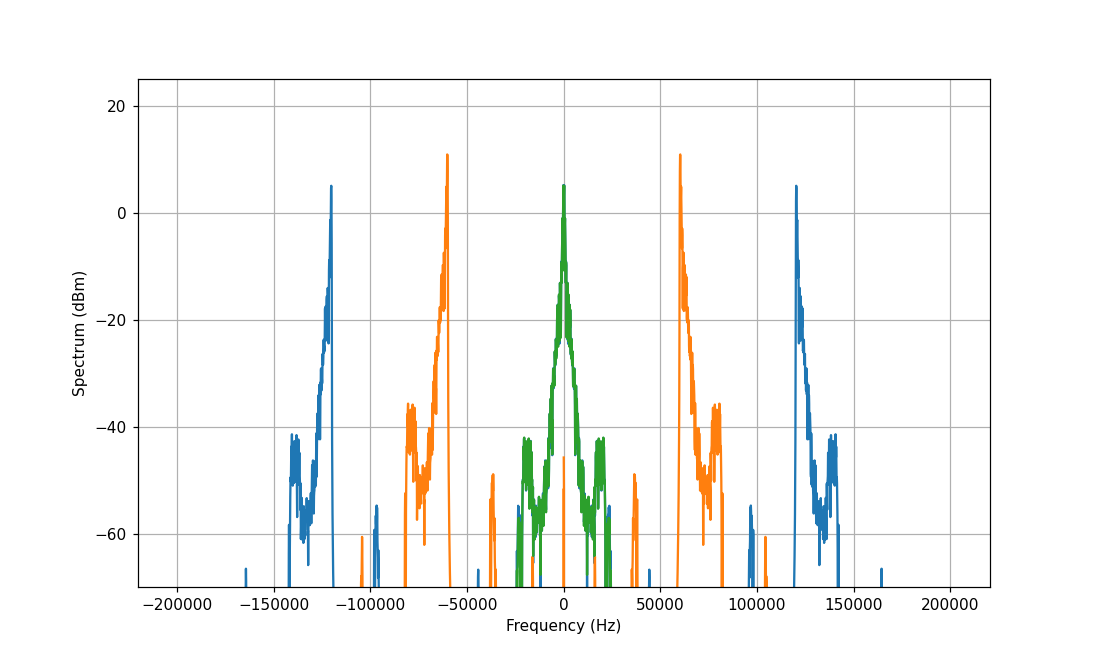

In [1]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import wave, sounddevice

from scipy.signal import welch, resample_poly, firls, lfilter, hilbert

audio_frame_size = 1000  # количество отсчетов аудиофайла, получаемых за один раз
frames_number = 500      # число обрабатываемых пачек данных
rate_ratio = 10          # коэффициент увеличения частоты дискретизации
audio_amp = 0.5          # коэффициент усиления аудиосигнала
Fc = 60e3                # частота несущей

modulation_method = "USB"  # USB или LSB

freq_offset = 0               # расстройка по частоте (Hz)
phase_offset = 0 * np.pi/180  # расстройка по фазе (градусы)

# открываем файл и получаем частоту дискретизации
audio_file = wave.open('../../wav/Audio_Source.wav')
audio_fs = audio_file.getframerate()

# частота дискретизации и размер кадра после передискретизации
signal_fs = audio_fs * rate_ratio
signal_frame_size = audio_frame_size * rate_ratio

# получение коэффициентов ФНЧ
H = firls(175, (0, 20e3, 30e3, signal_fs/2), (1, 1, 0, 0), fs=signal_fs)

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Spectrum (dBm)')
ax.set_xlim(-signal_fs/2, signal_fs/2)
ax.set_ylim(-70, 25)
ax.grid(True)

# создаем линии для будущих графиков
for _ in range(3):
    ax.plot(np.arange(signal_frame_size), np.zeros(signal_frame_size))

message = []
FIR_tap_values = np.zeros(len(H) - 1) # внутреннее состояние ФНЧ

t = np.linspace(0, signal_frame_size/signal_fs, signal_frame_size) 

for frame in range(frames_number):

    # формирование отсчетов аудиосигнала
    audio_data = audio_file.readframes(audio_frame_size)      # считываем отсчеты
    audio_data = np.frombuffer(audio_data, dtype=np.int16)    # преобразуем тип данных из byte в int16
    audio_data = np.reshape(audio_data, (-1, 2))              # разделяем отсчеты для правого и левого канала
    

    # МОДУЛЯЦИЯ
    # вычисление аналитического сигнала
    analytic_data = hilbert(audio_data[:,0] / 2**15)    
        
    # выделяем один канал и увеличиваем частоту дискретизации
    upsampled_data = resample_poly(analytic_data, rate_ratio, 1)
    
    # комплексный несущий сигнал
    # частота несущей: 60 kHz
    carrier = np.exp(1j * 2 * np.pi * 60e3 * t)
    
    # однополосная модуляция
    if modulation_method == "USB":
        ssb_am_signal = np.real(upsampled_data * carrier)
    else:
        ssb_am_signal = np.real(np.conj(upsampled_data) * carrier)
    
    
    # ДЕМОДУЛЯЦИЯ
    # формируем несущую с возможными ошибками
    demod_carrier = np.cos(2 * np.pi * (Fc + freq_offset) * t + phase_offset)
    
    # смешивание АМ-сигнала и несущей
    mixed_signal = ssb_am_signal * demod_carrier;
    
    # фильтрация сигнала
    baseband_signal, FIR_tap_values = lfilter(H, 1.0, np.real(mixed_signal), zi=FIR_tap_values)
    baseband_signal = baseband_signal - baseband_signal.mean()
    
    
    # построение спектрограмм
    signals = mixed_signal, ssb_am_signal, baseband_signal
    
    for i in range(3):
        f, spectrum = welch(signals[i], signal_fs, return_onesided=False, scaling='spectrum', nperseg=4096) # вычисление спектров
        spectrum_dBm = 10*np.log10(spectrum) + 30                                                    # перевод значений в dBm
        ax.lines[i].set_xdata(f)
        ax.lines[i].set_ydata(spectrum_dBm)
    
    # уменьшение частоты дискретизации
    audio_data = resample_poly(baseband_signal, 1, rate_ratio)
    message = np.concatenate((message, audio_data))
    
    # отрисовка графиков
    fig.canvas.draw() 
    
    # обновляем отсчеты времени
    t = t + signal_frame_size/signal_fs 

sounddevice.play(message * audio_amp, audio_fs, blocking=True)



Выше представлены преобразования в частотной области. Оранжевым цветом обозначен спектр принимаемого однополосного сигнала. Синим - спектр на выходе смесителя. Можно увидеть, что он состоит из информационного сообщения и спектральных составляющих на удвоенной частоте несущей. После фильтрации остается только информационное сообщение (зеленый цвет).

На слух можно оценить искажения аудиосигнала из-за рассогласования по фазе и частоте. В отличие от DSB сигнала при расстройке по фазе сигнал слышится также хорошо, и он не искажен. Это связано с тем, что теперь в сигнале после фильтрации присутствует слагаемое $\frac{1}{2}m_H \left(t\right)\cdot \sin \left(2\pi \Delta \textrm{ft}+\Delta \phi \right)$. При нулевой расстройке по фазе оно равно нулю, и возврастает при увеличении расстройки. То есть, при уменьшении первого слагаемого с сообщением, слагаемое с его преобразованием Гильберта растет, и наоборот. Сигналы $m\left(t\right)$ и $m_H \left(t\right)$имеют одинакове амплитудные спектры и различаются лишь фазой. Так как человеческий слух реагирует только на амплитудный спектр, для нас эти сигналы кажутся одинаковыми. Расстройка по частоте приводит к ухудшению качества и появлению свистящих звуков и биений.

## 2. Когерентная демодуляция при квадратурном приеме

В случае, когда прием однополостного сигнала осуществляется квадратурным способом (например почти во всех SDR-приемниках), структуру когерентного демодулятора можно упростить:

<img src="../../images/DSB_TC_Receiver_1_2.png" width=450/>

То есть, принятый однополосный сигнал нужно умножить на мнимую экспоненту, а потом просто выделить действительную часть. Далее для примера рассмотрим случай USB сигнала. В аналитическом виде описанные выше преобразования можно представить следующим образом. Пусть принятый однополосный сигнал имеет вид:

$$s_{\textrm{am}} \left(t\right)=m_A \left(t\right)\cdot e^{2\pi f_c t},$$

где, как и ранее, $m_A \left(t\right)=m\left(t\right)+j\cdot m_H \left(t\right)$ - аналитический сигнал, $m\left(t\right)$ - информационное сообщение, $m_H \left(t\right)$ - преобразование Гильберта от сообщения, $f_c$ - частота несущей.

После умножения на мнимую экспоненту, частота и фаза которой совпадает с несущей, получим:

$$s_{\textrm{mix}} \left(t\right)=m_A \left(t\right)\cdot e^{2\pi f_c t} \cdot e^{-2\pi f_c t} =m_A \left(t\right)=m\left(t\right)+j\cdot m_H \left(t\right).$$

Выделение действительной части приведет к точному восстановлению информационного сообщения: 

$$\textrm{Re}\left\lbrace s_{\textrm{mix}} \left(t\right)\right\rbrace =m\left(t\right).$$

Теперь рассмотрим, что произойдет при наличие раастройки по фазе и частоте. Сигнал на выходе смесителя можно представить в виде:

$$s_{\textrm{mix}} \left(t\right)=m_A \left(t\right)\cdot e^{2\pi f_c t} \cdot e^{-2\pi \left(f_c +\Delta f\right)t-\Delta \phi } =m_A \left(t\right)\cdot e^{-2\pi \Delta \textrm{ft}-\Delta \phi }.$$

После вычисления действительной части получим:

$$\textrm{Re}\left\lbrace s_{\textrm{mix}} \left(t\right)\right\rbrace =m\left(t\right)\cdot \cos \left(2\pi \Delta \textrm{ft}+\Delta \phi \right)-m_H \left(t\right)\cdot \sin \left(2\pi \Delta \textrm{ft}+\Delta \phi \right).$$

Данный результат совпадает с формулой, полученной в предыдущем разделе. Соответственно наличие расстройки по частоте и фазе будет приводить к аналогиным искажениям.

Ниже представлен скрипт для реализации когерентной демодуляции в случае квадратурного приема. С помощью переменных freq_offset и phase_offset можно задать расстройку по частоте и фазе и на слух оценить оскажения сигнала. Переменная modulation_method задает вид модуляции (USB или LSB).

<IPython.core.display.Javascript object>


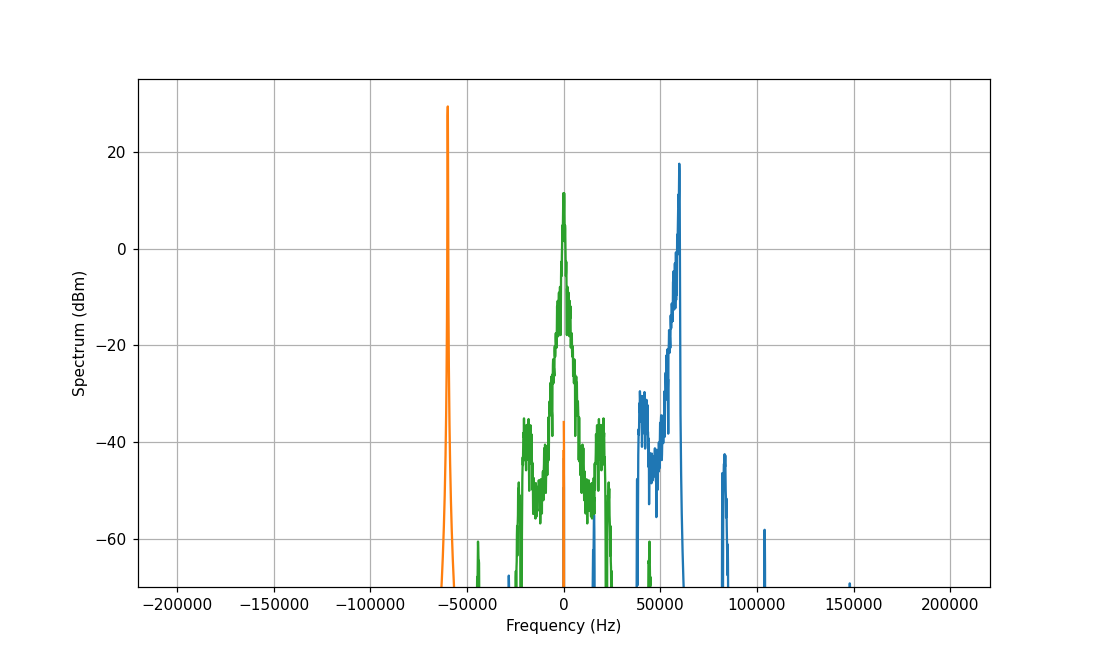

In [1]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import wave, sounddevice

from scipy.signal import welch, resample_poly, hilbert

audio_frame_size = 1000  # количество отсчетов аудиофайла, получаемых за один раз
frames_number = 500      # число обрабатываемых пачек данных
rate_ratio = 10          # коэффициент увеличения частоты дискретизации
audio_amp = 0.1          # коэффициент усиления аудиосигнала
Fc = 60e3                # частота несущей

modulation_method = "LSB"  # USB или LSB

freq_offset = 0               # расстройка по частоте (Hz)
phase_offset = 0 * np.pi/180  # расстройка по фазе (градусы)

# открываем файл и получаем частоту дискретизации
audio_file = wave.open('../../wav/Audio_Source.wav')
audio_fs = audio_file.getframerate()

# частота дискретизации и размер кадра после передискретизации
signal_fs = audio_fs * rate_ratio
signal_frame_size = audio_frame_size * rate_ratio

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Spectrum (dBm)')
ax.set_xlim(-signal_fs/2, signal_fs/2)
ax.set_ylim(-70, 35)
ax.grid(True)

# создаем линии для будущих графиков
for _ in range(3):
    ax.plot(np.arange(signal_frame_size), np.zeros(signal_frame_size))

message = []

t = np.linspace(0, signal_frame_size/signal_fs, signal_frame_size) 

for frame in range(frames_number):

    # формирование отсчетов аудиосигнала
    audio_data = audio_file.readframes(audio_frame_size)      # считываем отсчеты
    audio_data = np.frombuffer(audio_data, dtype=np.int16)    # преобразуем тип данных из byte в int16
    audio_data = np.reshape(audio_data, (-1, 2))              # разделяем отсчеты для правого и левого канала
    

    # МОДУЛЯЦИЯ
    # вычисление аналитического сигнала
    analytic_data = hilbert(audio_data[:,0] / 2**15)    
        
    # выделяем один канал и увеличиваем частоту дискретизации
    upsampled_data = resample_poly(analytic_data, rate_ratio, 1)
    
    # комплексный несущий сигнал
    # частота несущей: 60 kHz
    carrier = np.exp(1j * 2 * np.pi * 60e3 * t)
    
    # однополосная модуляция
    if modulation_method == "USB":
        ssb_am_signal = upsampled_data * carrier
    else:
        ssb_am_signal = np.conj(upsampled_data) * carrier
    
    
    # ДЕМОДУЛЯЦИЯ
    # формируем несущую с возможными ошибками
    demod_carrier = np.exp(-1j * 2 * np.pi * (Fc + freq_offset) * t + phase_offset)
    
    # смешивание АМ-сигнала и несущей и выделение действительной части
    baseband_signal = np.real(ssb_am_signal * demod_carrier);
    baseband_signal = baseband_signal - baseband_signal.mean()
    
    # построение спектрограмм
    signals = ssb_am_signal, demod_carrier, baseband_signal
    
    for i in range(3):
        f, spectrum = welch(signals[i], signal_fs, return_onesided=False, scaling='spectrum', nperseg=4096) # вычисление спектров
        spectrum_dBm = 10*np.log10(spectrum) + 30                                                    # перевод значений в dBm
        ax.lines[i].set_xdata(f)
        ax.lines[i].set_ydata(spectrum_dBm)
    
    # уменьшение частоты дискретизации
    audio_data = resample_poly(baseband_signal, 1, rate_ratio)
    message = np.concatenate((message, audio_data))
    
    # отрисовка графиков
    fig.canvas.draw() 
    
    # обновляем отсчеты времени
    t = t + signal_frame_size/signal_fs 

sounddevice.play(message * audio_amp, audio_fs, blocking=True)

Выше представлены преобразования в частотной области. Синим цветом обозначен спектр принимаемого  однополосного сигнала. Так как прием квадратурный, спектр сигнала комплексный и расположен только в положительной области частот. Оранжевым цветом представлена мнимая экспонента, а зеленым - сигнал на выходе смесителя. 

## 3. Некогерентная демодуляция однополосного сигнала с подавленной несущей

В случае однополосной амплитудной модуляции с подавленной несущей сама несущая не передается, что является преимуществом, так приводит к экономии мощности. Однако, с другой стороны это усложняет прием такого сигнала. Очевидно, что из-за наличия в сигнала слагаемого, равного преобразованию Гильберта от сообщения, огибающая сигнала не будет совпадать с сообщением. Таким образом, некогерентный демодулятор для приема сигнала с подавленной несущей применять нельзя. 

Убедимся в этом для случая квадратурного приема. Для получаения огибающей комплексного сигнала достаточно вычислить его модуль. Воспользуемся тем же скриптом, который рассмотривается в DSB TC Receiver Part 3. Скрипт представлен ниже:

<IPython.core.display.Javascript object>


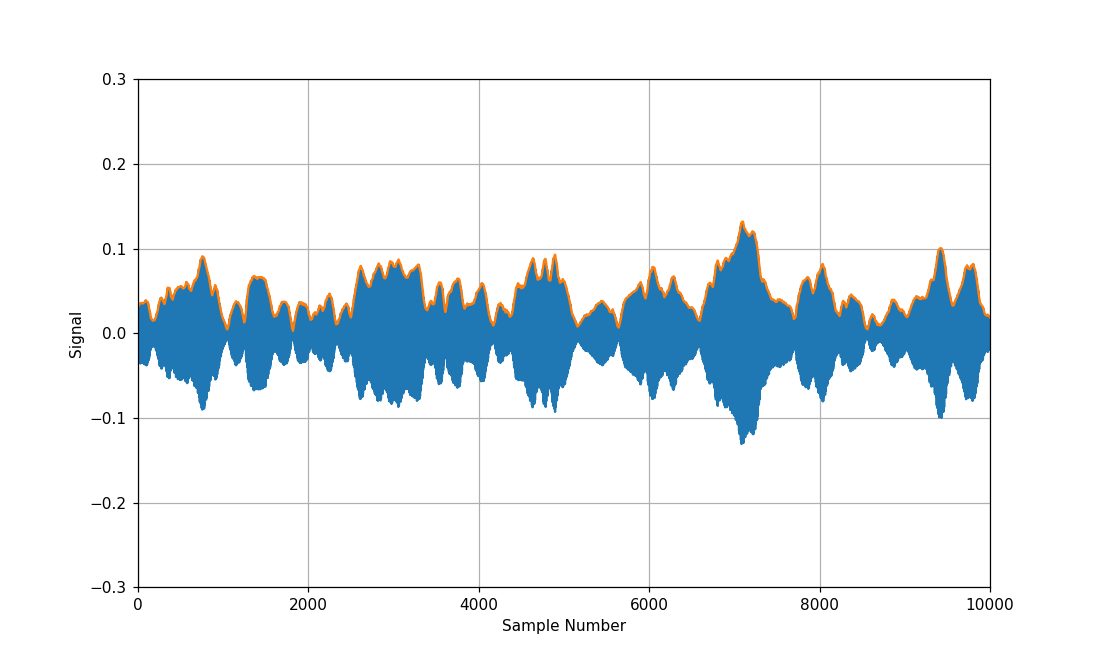

In [2]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import wave, sounddevice

from scipy.signal import welch, resample_poly

signal_frame_size = 10000  # количество отсчетов аудиофайла, получаемых за один раз
frames_number = 500        # число обрабатываемых пачек данных
rate_ratio = 10            # коэффициент увеличения частоты дискретизации
audio_amp = 2              # коэффициент усиления аудиосигнала
Fc = 60e3                  # частота несущей

modulation_method = "LSB"  # USB или LSB

# открываем файл и получаем частоту дискретизации
if modulation_method == "USB":
    signal_file = wave.open('../../wav/Audio_USB_SC.wav')
else:
    signal_file = wave.open('../../wav/Audio_LSB_SC.wav')
    
signal_fs = signal_file.getframerate()

# частота дискретизации и размер кадра после передискретизации
audio_fs = signal_fs / rate_ratio
audio_frame_size = signal_frame_size / rate_ratio

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Sample Number')
ax.set_ylabel('Signal')
ax.set_xlim(0, signal_frame_size)
ax.set_ylim(-0.3, 0.3)
ax.grid(True)

# создаем линии для будущих графиков
for _ in range(2):
    ax.plot(np.arange(signal_frame_size), np.zeros(signal_frame_size))

message = []

t = np.linspace(0, signal_frame_size/signal_fs, signal_frame_size) 

for frame in range(frames_number):

    # формирование отсчетов аудиосигнала
    am_signal = signal_file.readframes(signal_frame_size)      # считываем отсчеты
    am_signal = np.frombuffer(am_signal, dtype=np.int16)       # преобразуем тип данных из byte в int16
    am_signal = np.reshape(am_signal, (-1, 2))                 # разделяем отсчеты для правого и левого канала
    am_signal = (am_signal[:,0] + 1j*am_signal[:,1]) / 2**15   # выделяем комплексный сигнал и нормируем отсчеты к единице
    
    # вычисление модуля сигнала для амплитудной детекции
    baseband_signal = np.abs(am_signal)
    
    # построение временных диаграмм
    ax.lines[0].set_ydata(np.real(am_signal))
    ax.lines[1].set_ydata(baseband_signal)
    
    # удаление постоянной составляющей и уменьшение частоты дискретизации
    baseband_signal = baseband_signal - baseband_signal.mean()
    audio_data = resample_poly(baseband_signal, 1, rate_ratio)
    message = np.concatenate((message, audio_data))
    
    # отрисовка графиков
    fig.canvas.draw() 
    
    # обновляем отсчеты времени
    t = t + signal_frame_size/signal_fs 

sounddevice.play(message * audio_amp, audio_fs, blocking=True)

Выше представлены временные диаграммы сигналов на входе (синий цвет, действительная составляющая принятого сигнала) и выходе (оранжевый цвет) демодулятора. 

На слух можно обнаружить явные искажения аудиосообщения, что подтверждает невозможность приема однополосного сигнала с подавленной несущей некогерентным способом. 

## 4. Когерентная демодуляция с помощью обычной фазовой автоподстройки частоты

Рассмотренный в DSB TC Receiver Part 2 способ востановления несущей с помощью PLL для сигнала с подавленной несущей так же не пременим. В принимаемом сигнале отсутствует в явном виде гармонический сигнал соответствующий несущей. Из-за этого фазовая автоподстройка частоты не может войти в режим синхронизации и точно подстроить частоту и фазу управляемого генератора. 

Убедимся в этом для случая квадратурного приема. Воспользуемся тем же скриптом, который рассмотривается в DSB TC Receiver Part 2. Скрипт представлен ниже:

<IPython.core.display.Javascript object>


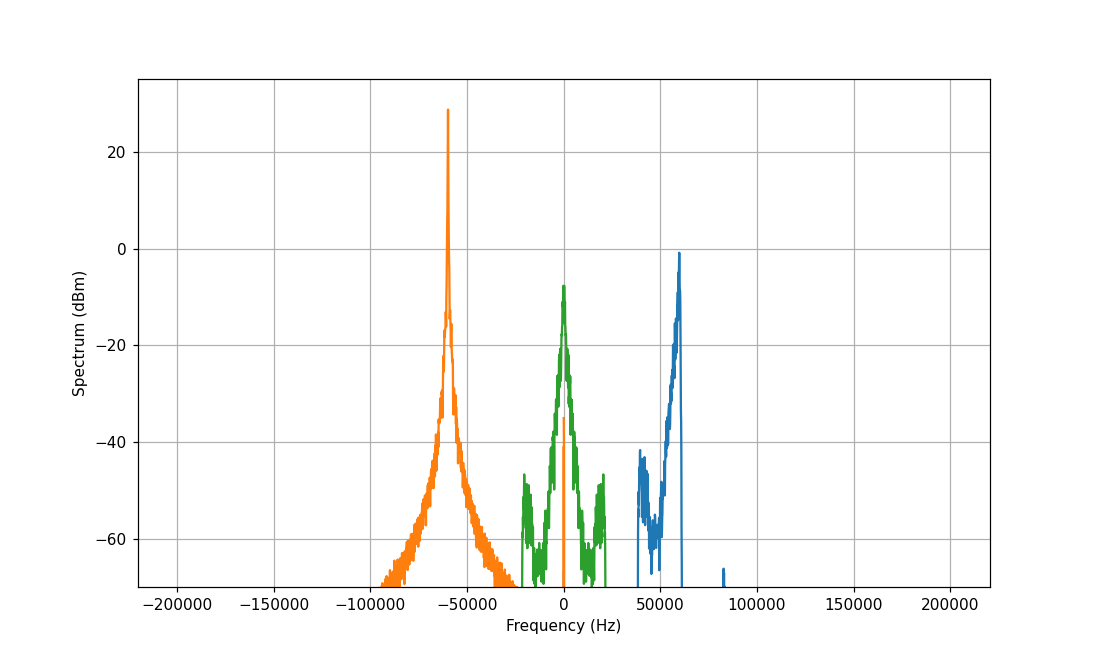

In [1]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import wave, sounddevice

from scipy.signal import welch, resample_poly
from am_complex_pll import Am_complex_pll

signal_frame_size = 10000  # количество отсчетов аудиофайла, получаемых за один раз
frames_number = 500        # число обрабатываемых пачек данных
rate_ratio = 10            # коэффициент увеличения частоты дискретизации
audio_amp = 2              # коэффициент усиления аудиосигнала
Fc = 60e3                  # частота несущей

modulation_method = "LSB"  # USB или LSB

freq_offset = 100          # расстройка по частоте (Hz)

# открываем файл и получаем частоту дискретизации
if modulation_method == "USB":
    signal_file = wave.open('../../wav/Audio_USB_SC.wav')
else:
    signal_file = wave.open('../../wav/Audio_LSB_SC.wav')
    
signal_fs = signal_file.getframerate()

# частота дискретизации и размер кадра после передискретизации
audio_fs = signal_fs / rate_ratio
audio_frame_size = signal_frame_size / rate_ratio

# создаем объект PLL
am_pll = Am_complex_pll(
    sample_frequency = signal_fs,
    noise_bandwidth = 100,
    damping_factor = 0.7,
    central_frequency = Fc + freq_offset
    )

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Spectrum (dBm)')
ax.set_xlim(-signal_fs/2, signal_fs/2)
ax.set_ylim(-70, 35)
ax.grid(True)

# создаем линии для будущих графиков
for _ in range(3):
    ax.plot(np.arange(signal_frame_size), np.zeros(signal_frame_size))

message = []

t = np.linspace(0, signal_frame_size/signal_fs, signal_frame_size) 

for frame in range(frames_number):

    # формирование отсчетов аудиосигнала
    am_signal = signal_file.readframes(signal_frame_size)      # считываем отсчеты
    am_signal = np.frombuffer(am_signal, dtype=np.int16)       # преобразуем тип данных из byte в int16
    am_signal = np.reshape(am_signal, (-1, 2))                 # разделяем отсчеты для правого и левого канала
    am_signal = (am_signal[:,0] + 1j*am_signal[:,1]) / 2**15   # выделяем комплексный сигнал и нормируем отсчеты к единице
    
    # формируем несущую c помощью PLL
    _, carrier = am_pll.step(am_signal)
    
    # смешивание АМ-сигнала и несущей и выделение действительной части
    baseband_signal = np.real(am_signal * np.conj(carrier))
    baseband_signal = baseband_signal - baseband_signal.mean()
    
    # построение спектрограмм
    signals = am_signal, np.conj(carrier), baseband_signal
    
    for i in range(3):
        f, spectrum = welch(signals[i], signal_fs, return_onesided=False, scaling='spectrum', nperseg=4096) # вычисление спектров
        spectrum_dBm = 10*np.log10(spectrum) + 30                                                    # перевод значений в dBm
        ax.lines[i].set_xdata(f)
        ax.lines[i].set_ydata(spectrum_dBm)
    
    # уменьшение частоты дискретизации
    audio_data = resample_poly(baseband_signal, 1, rate_ratio)
    message = np.concatenate((message, audio_data))
    
    # отрисовка графиков
    fig.canvas.draw() 
    
    # обновляем отсчеты времени
    t = t + signal_frame_size/signal_fs 

sounddevice.play(message * audio_amp, audio_fs, blocking=True)

Выше представлены сигналы в частотной области. Синим цветом обозначен спектр принимаемого однополосного сигнала. Оранжевым цветом обозначен сигнал на выходе NCO PLL, а зеленым - сигнал на выходе смесителя. Можно увидеть, что спектр на выходе NCO намного шире, чем на графике, показанном в DSB TC Receiver Part 2. Это свидетельствует о плохой синхронизации, так как сигнал на выходе NCO отличается от гармонического.

На слух также можно обнаружить искажения аудиосообщения. Таким образом, качествено восстановить несущую, просто подав принятый однополосный сигнал на вход PLL, не получится.

## Литература:
- B. P. Lathi Modern Digital and Analog Communication Systems 
- R. Stewart, K. Barlee, D. Atkinson, L. Crockett Software Defined Radio using MATLAB® & Simulink and the RTL-SDR